### Lecture 31: Outlier Removal using IQR Method

Steps 
1. Check distribution of column must be skewed
2. Plot Boxplot (optional)
3. Find Q1,Q3
4. Find maximun & Minimum
5. Remove or Cap them

Importing Libraries

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

Importing dataframe

In [351]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

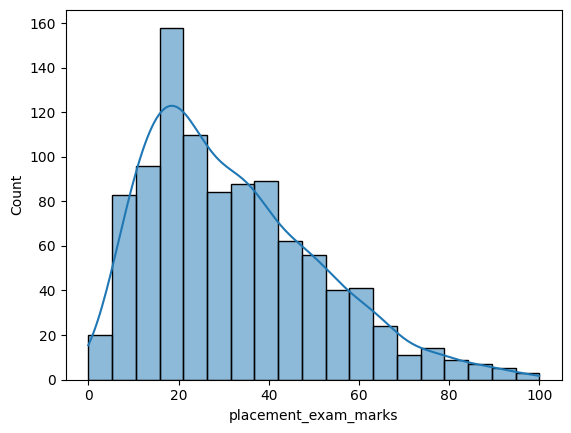

In [352]:
sns.histplot(df['placement_exam_marks'],kde=True)

Plotting Boxplot 

<Axes: ylabel='placement_exam_marks'>

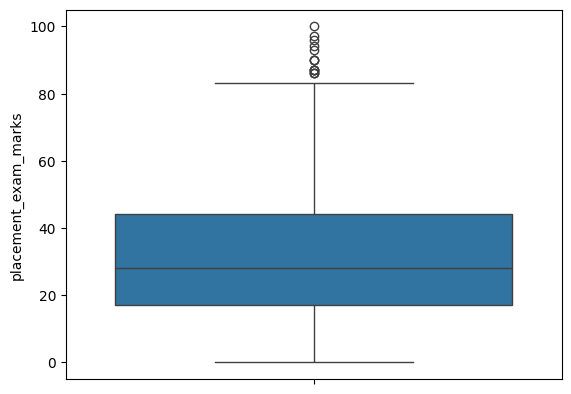

In [353]:
sns.boxplot(df['placement_exam_marks'])

In [354]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


Find Q1,Q3

In [355]:
Q1=df['placement_exam_marks'].quantile(.25)
Q2=df['placement_exam_marks'].quantile(.50)
Q3=df['placement_exam_marks'].quantile(.75)

In [356]:
print(f'{Q1,Q2,Q3}')

(np.float64(17.0), np.float64(28.0), np.float64(44.0))


Find maximun & Minimum

In [357]:
IQR=Q3-Q1
print(IQR)

27.0


In [358]:
Maximum=Q3+1.5*IQR
Minimum=Q1-1.5*IQR

Outlier Detection

In [359]:
df.shape

(1000, 3)

In [360]:
df[(df['placement_exam_marks']>Maximum) | (df['placement_exam_marks']<Minimum)].shape

(15, 3)

Trimming

In [361]:
df=df[(df['placement_exam_marks']<Maximum) & (df['placement_exam_marks']>Minimum)]

Capping

In [362]:
df['placement_exam_marks']=df['placement_exam_marks'].clip(upper=Maximum,lower=Minimum)